## parsing harps website

* [HARPS bank](http://www.mpia.de/homes/trifonov/HARPS_RVBank.html)

In [2]:
from urllib.request import urlopen, urlretrieve
from os.path import exists
from os.path import join
import sys

import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_3d
from astropy.io import ascii


import sys
sys.path.append('..')
import archive_digger as ad

In [4]:
df = ad.get_harps_database(clobber=False)

Loaded: ../data/harps_db.csv


In [3]:
ra=279.272#+2/60
dec=5.292#+2/60

target = SkyCoord(ra=ra, dec=dec, unit=u.deg)
res = ad.query_target(target, df, dist=1)
res


Querying objects within 1" of ra,dec=(279.272,5.292)

Nearest HARPS obj to target is
BD+053829: ra,dec=(279.2717,5.2921)

Try larger angular distance than d=1.0633"



In [4]:
toi = 704.01
q = ad.query_toi(toi=toi, tic=None, clobber=False)
r = q['RA'].values[0]
d = q['Dec'].values[0]
target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
res = ad.query_target(target, df, dist=10)
res

Loaded: ../data/TOIs.csv

Querying objects within 10" of ra,dec=(279.272,5.292)

There are 1 matches: ['BD+053829']
                                                                      0
Data product plots                                  BD+053829_plots.pdf
Pre-upgrade DRS                            BD+053829_harps_pre-drs.vels
Post-upgrade DRS                                                    NaN
Pre-upgrade standard SERVAL             BD+053829_harps_pre-serval.vels
Post-upgrade standard SERVAL                                        NaN
Pre-upgrade mlc SERVAL (use these)  BD+053829_harps_pre_serval-mlc.vels
Post-upgrade mlc SERVAL(use these)                                  NaN


,Target,RA,DEC,Sp. Type,T_eff [K],V [mag],G [mag],Data product plots,Pre-upgrade DRS,Post-upgrade DRS,Pre-upgrade standard SERVAL,Post-upgrade standard SERVAL,Pre-upgrade mlc SERVAL (use these),Post-upgrade mlc SERVAL(use these),RA_deg,DEC_deg
0,BD+053829,18:37:05.2146,+05:17:31.620,G5,4872.9,9.8,9.4,BD+053829_plots.pdf,BD+053829_harps_pre-drs.vels,NaN,BD+053829_harps_pre-serval.vels,NaN,BD+053829_harps_pre_serval-mlc.vels,NaN,279.271727,5.292117


In [5]:
res.columns

Index(['Target', 'RA', 'DEC', 'Sp. Type', 'T_eff [K]', 'V [mag]', 'G [mag]',
       'Data product plots', 'Pre-upgrade DRS', 'Post-upgrade DRS',
       'Pre-upgrade standard SERVAL', 'Post-upgrade standard SERVAL',
       'Pre-upgrade mlc SERVAL (use these)',
       'Post-upgrade mlc SERVAL(use these)', 'RA_deg', 'DEC_deg'],
      dtype='object')

In [6]:
ad.ALL_DATA_PRODUCTS

['Data product plots',
 'Pre-upgrade DRS',
 'Post-upgrade DRS',
 'Pre-upgrade standard SERVAL',
 'Post-upgrade standard SERVAL',
 'Pre-upgrade mlc SERVAL (use these)',
 'Post-upgrade mlc SERVAL(use these)']

In [7]:
r = res.iloc[0]
rv = ad.get_rv(r, col='Pre-upgrade DRS', return_fp=False)
rv

,col1,col2,col3
0,2453450.873,-25653.956,0.885
1,2453462.868,-25647.876,0.999
2,2453499.801,-25644.227,4.456
3,2453500.744,-25652.905,1.558
4,2453521.740,-25643.707,1.247
5,2453593.690,-25653.209,1.276
6,2456454.807,-25653.637,1.066
7,2456525.632,-25648.987,2.957
8,2456538.589,-25651.804,1.071


## finder chart

In [65]:
target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
target_coord.ra.deg, target_coord.dec.deg

(91.08983333333332, -55.31158611111111)

In [7]:
res

,Target,RA,DEC,Sp. Type,T_eff [K],V [mag],G [mag],Data product plots,Pre-upgrade DRS,Post-upgrade DRS,Pre-upgrade standard SERVAL,Post-upgrade standard SERVAL,Pre-upgrade mlc SERVAL (use these),Post-upgrade mlc SERVAL(use these),RA_deg,DEC_deg
661,GJ9201,06:04:20.3587,-55:18:46.838,M2.5V,NaN,12.1,11.2,GJ9201_plots.pdf,GJ9201_harps_pre-drs.vels,NaN,GJ9201_harps_pre-serval.vels,NaN,GJ9201_harps_pre_serval-mlc.vels,NaN,91.084828,-55.313011
2879,TYC8525-1314-1,06:04:20.3587,-55:18:46.838,M2.5V,NaN,12.1,11.2,TYC8525-1314-1_plots.pdf,TYC8525-1314-1_harps_pre-drs.vels,NaN,TYC8525-1314-1_harps_pre-serval.vels,NaN,TYC8525-1314-1_harps_pre_serval-mlc.vels,NaN,91.084828,-55.313011


Loaded: ../data/TOIs.csv


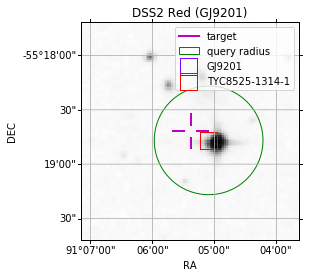

In [44]:
%matplotlib inline
from astroplan.plots import plot_finder_image
import matplotlib.pyplot as pl
from astropy.visualization.wcsaxes import SphericalCircle
import matplotlib.cm as cm
from collections import OrderedDict
import numpy as np

toi = 704.01
ang_dist = 30*u.arcsec
fov_rad = 120*u.arcsec
survey='DSS2 Red'

q = ad.query_toi(toi=toi, tic=None, clobber=False)
r = q['RA'].values[0]
d = q['Dec'].values[0]
target_coord = SkyCoord(ra=r, dec=d, unit=(u.hourangle, u.deg))
#convert hms to degree
target_coord = SkyCoord(target_coord.ra.deg, target_coord.dec.deg, unit=u.deg)
res = ad.query_target(target_coord, df, dist=ang_dist, verbose=False)

nearest_obj = res['Target'].values[0]
nearest_obj_ra,nearest_obj_dec =res[['RA_deg','DEC_deg']].values[0]
nearest_obj_coord = SkyCoord(ra=nearest_obj_ra, dec=nearest_obj_dec, unit=u.deg)

#target in reticle
ax,hdu=plot_finder_image(target_coord,fov_radius=fov_rad,reticle=True,survey=survey,reticle_style_kwargs={'label':'target'})
c = SphericalCircle((nearest_obj_ra, nearest_obj_dec)*u.deg, ang_dist, edgecolor='green', facecolor='none',
              transform=ax.get_transform('icrs'), label='query radius')
ax.set_title('{} ({})'.format(survey,nearest_obj))
ax.add_patch(c)

#harps objects within angular distance
coords = SkyCoord(ra=res['RA_deg'], dec=res['DEC_deg'], unit=u.deg)
sep2d = target_coord.separation(coords)

idxs = sep2d < ang_dist
colors = cm.rainbow(np.linspace(0, 1, idxs.sum()))

if len(coords[idxs])>1:
    for n,(coord,color) in enumerate(zip(coords[idxs],colors)):
        ax.scatter(coord.ra.deg, coord.dec.deg, transform=ax.get_transform('fk5'), s=300,
           marker='s', edgecolor=color, facecolor='none',label=res.loc[idxs,'Target'].values[n])
else:
    ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('fk5'), s=300,
           marker='s', edgecolor='blue', facecolor='none',label=res['Target'])

handles, labels = pl.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
pl.legend(by_label.values(), by_label.keys())